# From SOAP message to PlantUML Object model

### Description
For movin'u two .wsdl files were found in the ESB code base:

With this notebook, these files are reverse engineered and turned into a datamodel

### 1. By using the xml part of the soap message via SOAP UI

Manual steps:
- Load the wsdl into SOAPUI
- copy request / response message into an empty xml-file. 
N.B. this script uses full soap message

In [10]:
import glob
my_xmls = glob.glob('*.xml')
my_xmls

['UpdateWosIntake.xml', 'UpdateWosWorkAssignment.xml', 'wip.xml']

In [6]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\webservices\\movinu'

In [2]:
%pycat 'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\webservices\\movinu\\wosintakeplanned.xml'

### Getting the request data

In [11]:
#select the xml files manually
request_xml='wip.xml'
#response_xml= 'objectAfmeldenResponse.xml'
method_name = 'WosIntakePlanned'

In [12]:
#create a new file with the Postman body
import xml.etree.ElementTree as ET #import the library 
tree = ET.parse(request_xml) #parse the XML
print(request_xml)
ET.dump(tree) #print the xml file

wip.xml
<ns0:Envelope xmlns:ns0="http://www.w3.org/2003/05/soap-envelope" xmlns:ns1="http://tempuri.org/" xmlns:ns2="http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax">
   <ns0:Header />
   <ns0:Body>
      <ns1:WosIntakePlanned>
         
         <ns1:wosIntakePlanned>
            
            <ns2:WWS>
               
               <ns2:atticWithFixedStairs>?</ns2:atticWithFixedStairs>
               
               <ns2:carportPresent>?</ns2:carportPresent>
               
               <ns2:extraQualityBathroom>?</ns2:extraQualityBathroom>
               
               <ns2:extraQualityKitchen>?</ns2:extraQualityKitchen>
               
               <ns2:extraQualityToilet>?</ns2:extraQualityToilet>
               
               <ns2:heatingUtility>?</ns2:heatingUtility>
               
               <ns2:lengthKitchenWorktop>?</ns2:lengthKitchenWorktop>
               
               <ns2:numberOfAdditionalHeatedAreas>?</ns2:numberOfAdditionalHeatedAreas>
        

In [21]:
request_list =[]
for elem in tree.iter():
    request_list.append(elem.tag)
request_list

['{http://www.w3.org/2003/05/soap-envelope}Envelope',
 '{http://www.w3.org/2003/05/soap-envelope}Header',
 '{http://www.w3.org/2003/05/soap-envelope}Body',
 '{http://tempuri.org/}WosIntakePlanned',
 '{http://tempuri.org/}wosIntakePlanned',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}WWS',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}atticWithFixedStairs',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}carportPresent',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}extraQualityBathroom',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}extraQualityKitchen',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}extraQualityToilet',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}heatingUtility',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}lengthKitchenWorktop',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}numberOfAdditionalHeatedAreas',
 '{http://schemas.

In [22]:
#remove th soap headers
del request_list[0:4]
request_list

['{http://tempuri.org/}wosIntakePlanned',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}WWS',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}atticWithFixedStairs',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}carportPresent',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}extraQualityBathroom',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}extraQualityKitchen',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}extraQualityToilet',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}heatingUtility',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}lengthKitchenWorktop',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}numberOfAdditionalHeatedAreas',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}numberOfAdditionalHeatedAreasWW',
 '{http://schemas.datacontract.org/2004/07/MovinU.Data.Erp.Ax}numberOfHeatedRooms',
 '{http://schemas.datacontract.org/2

In [23]:
attribute_list =[]
for i in range(len(request_list)):
    my_s = request_list[i]
    my_l = my_s.split('}')
    my_s2= my_l[1]
    attribute_list.append(my_s2)
    #print(my_s2)
attribute_list

['wosIntakePlanned',
 'WWS',
 'atticWithFixedStairs',
 'carportPresent',
 'extraQualityBathroom',
 'extraQualityKitchen',
 'extraQualityToilet',
 'heatingUtility',
 'lengthKitchenWorktop',
 'numberOfAdditionalHeatedAreas',
 'numberOfAdditionalHeatedAreasWW',
 'numberOfHeatedRooms',
 'numberOfHeatedRoomsWW',
 'numberOfSinks',
 'numberOfToilets',
 'privateOutsideArea',
 'provisionBathroom',
 'provisionBathroom2',
 'sizeAttic',
 'sizeAtticWithFixedStairs',
 'sizeAtticwithoutfixedstairs',
 'sizeBathroom1',
 'sizeBathroom2',
 'sizeBedroom1',
 'sizeBedroom2',
 'sizeBedroom3',
 'sizeBedroom4',
 'sizeBedroom5',
 'sizeBedroom6',
 'sizeBedroom7',
 'sizeBedroomAttic',
 'sizeBedroomAttic2',
 'sizeCellar',
 'sizeGarage',
 'sizeGreenery',
 'sizeInsideStorage1',
 'sizeInsideStorage2',
 'sizeInsideStorage3',
 'sizeKitchen',
 'sizeLaundryroom',
 'sizeLivingRoom1',
 'sizeLivingRoom2',
 'sizeOutsideStorage1',
 'sizeOutsideStorage2',
 'sizeOutsideStorage3',
 'sizeUtilityroom',
 'toiletInBathroom',
 'chang

In [24]:
#creating a plantUML .txt file based on the list above
textfile = open(str(method_name) + '_plantuml.txt', 'w')
textfile.write('@startuml\n')
textfile.write('title '+ str(method_name) + '\n')
textfile.write('object '+attribute_list[0] +'{\n')
for i in range (len(attribute_list)):
    try:
        textfile.write(attribute_list[i+1] + "\n")
    except:
        pass
textfile.write('}\n')
textfile.write('@enduml')
textfile.close() 
print('done')

done


In [25]:
#check the file
import glob
my_txts= glob.glob('*.txt')
my_txts

['updatewosintake_plantuml.txt',
 'UpdateWosWorkAssignment_plantuml.txt',
 'WosIntakePlanned_plantuml.txt']

In [27]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\webservices\\movinu'

In [26]:
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\Webservices\\movinu\\WosIntakePlanned_plantuml.txt

In [27]:
#convert the txt file to an .png image using plantuml
!python -m plantuml WosIntakePlanned_plantuml.txt

[{'filename': 'WosIntakePlanned_plantuml.txt', 'gen_success': True}]


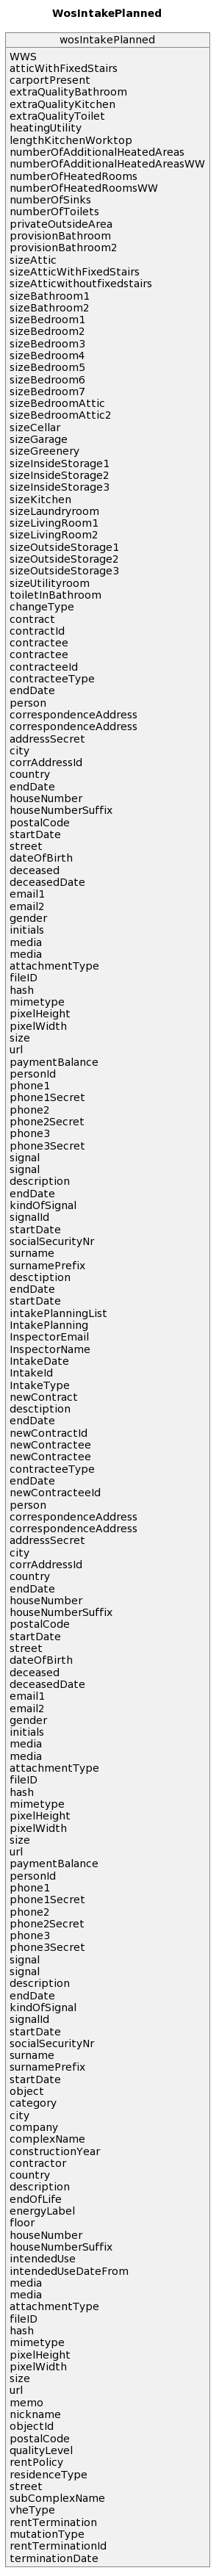

In [28]:
from IPython import display
display.Image(filename='WosIntakePlanned_plantuml.png')